### Forecasting with the Holt-Winters Method

+ Alias    Description
+ B        business day frequency
+ C        custom business day frequency
+ D        calendar day frequency
+ W        weekly frequency
+ M        month end frequency
+ SM       semi-month end frequency (15th and end of month)
+ BM       business month end frequency
+ CBM      custom business month end frequency
+ MS       month start frequency
+ SMS      semi-month start frequency (1st and 15th)
+ BMS      business month start frequency
+ CBMS     custom business month start frequency
+ Q        quarter end frequency
+ BQ       business quarter end frequency
+ QS       quarter start frequency
+ BQS      business quarter start frequency
+ A, Y     year end frequency
+ BA, BY   business year end frequency
+ AS, YS   year start frequency
+ BAS, BYS business year start frequency
+ BH       business hour frequency
+ H        hourly frequency
+ T, min   minutely frequency
+ S        secondly frequency
+ L, ms    milliseconds
+ U, us    microseconds
+ N        nanoseconds

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('airline-passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [4]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Train Test Split

In [5]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

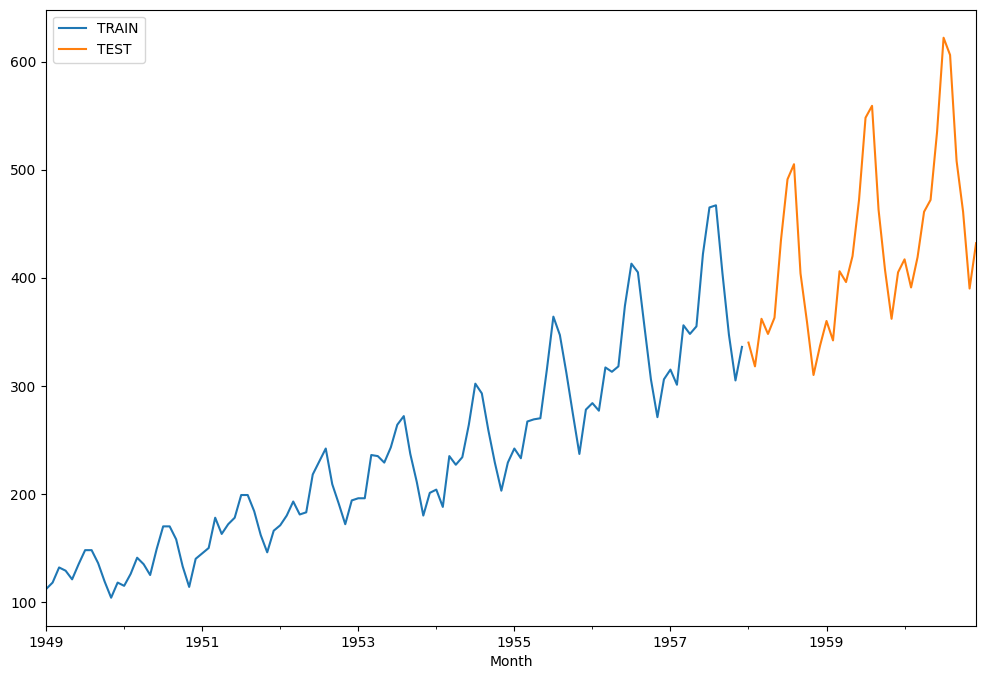

In [6]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

## Fitting the Model

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()

## Evaluating Model against Test Set

In [10]:
test_predictions = fitted_model.forecast(36)

In [11]:
test_predictions

1958-01-01    356.968490
1958-02-01    344.588591
1958-03-01    405.718038
1958-04-01    400.610481
1958-05-01    409.001351
1958-06-01    480.693994
1958-07-01    530.469835
1958-08-01    523.288414
1958-09-01    454.210347
1958-10-01    392.517797
1958-11-01    345.928081
1958-12-01    396.604681
1959-01-01    408.958366
1959-02-01    394.775424
1959-03-01    464.807932
1959-04-01    458.956497
1959-05-01    468.569436
1959-06-01    550.703593
1959-07-01    607.728925
1959-08-01    599.501582
1959-09-01    520.362796
1959-10-01    449.685172
1959-11-01    396.310002
1959-12-01    454.367281
1960-01-01    468.520191
1960-02-01    452.271606
1960-03-01    532.503842
1960-04-01    525.800188
1960-05-01    536.813181
1960-06-01    630.909584
1960-07-01    696.240242
1960-08-01    686.814646
1960-09-01    596.149869
1960-10-01    515.178561
1960-11-01    454.029684
1960-12-01    520.542585
Freq: MS, dtype: float64

In [ ]:
#train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
#test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

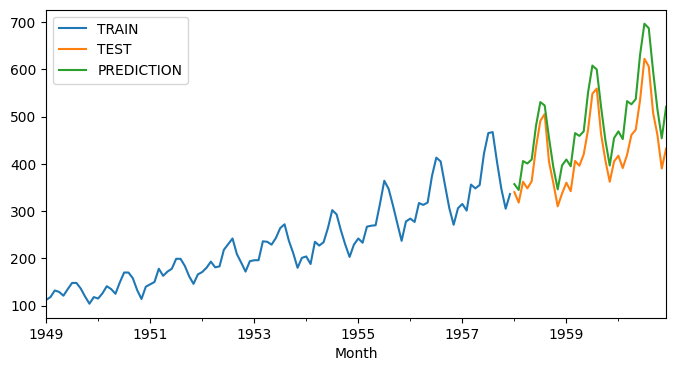

In [12]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(8,4))
test_predictions.plot(legend=True,label='PREDICTION');

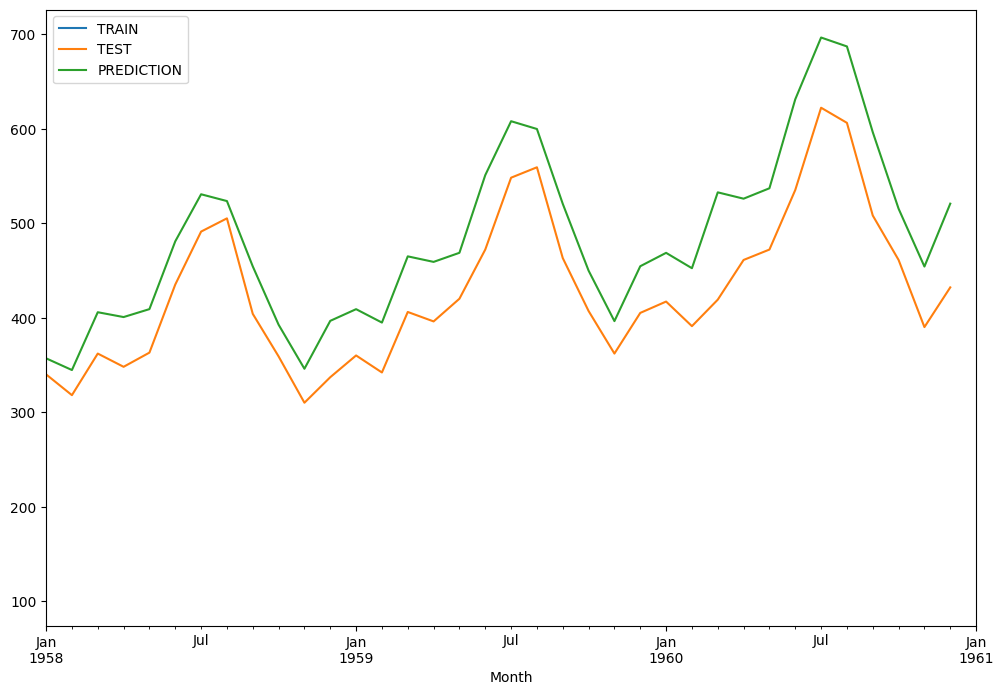

In [13]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(test_data,test_predictions)

3525.7937580270673

In [16]:
np.sqrt(mean_squared_error(test_data,test_predictions))

59.37839470739393

In [17]:
test_data.describe()

,Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


## Forecasting into Future

In [18]:
final_model = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [19]:
forecast_predictions = final_model.forecast(36)

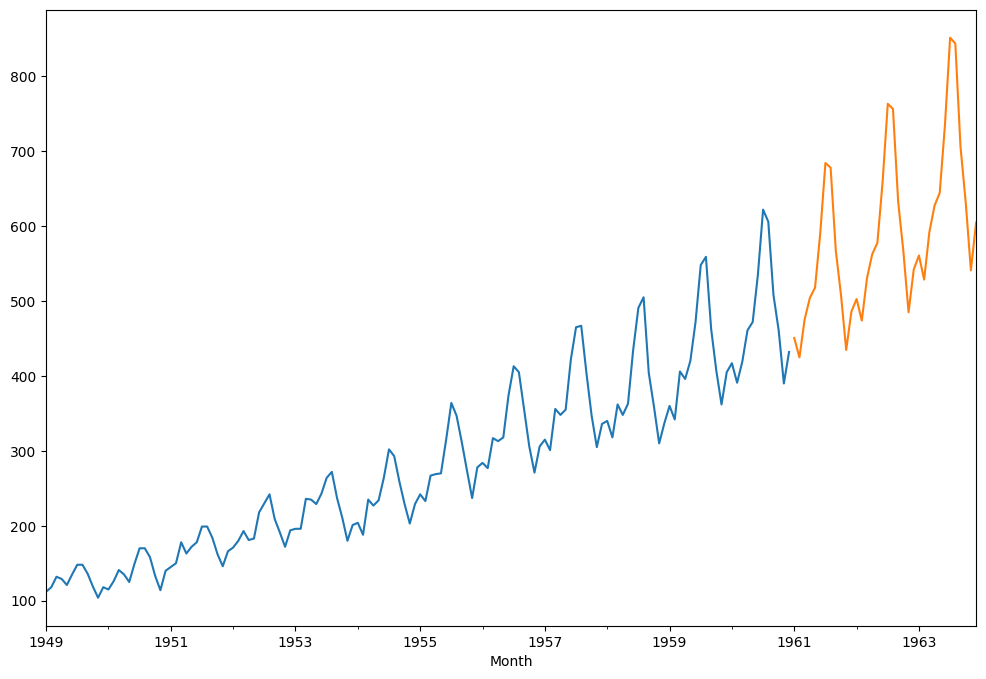

In [20]:
df['Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();